In [1]:
import numpy as np
import pickle
from joblib import load
import matplotlib.pyplot as plt

In [85]:
data_path = "Y:\\R13\\20231212_153718.rec\\preprocessing_output\\"
spike_filename = data_path + "probe2\\trial_binned_mat_start_align_auditory.npy"
behavior_filename = data_path + "auditoryTuning\\behav_df"

In [86]:
rat_id = '13'
probe_num = '2'
rec_datetime = spike_filename.split('.rec')[0][-15:]
spikes_dict = load(spike_filename)
spikes_mat = spikes_dict['binned_mat'] 
behavior_df = load(behavior_filename)
# spikes_mat shape (n_neurons, n_trials, downsampled_trials?)
print(spikes_mat.shape)
behavior_df

(26, 599, 480)


,volume,frequency,TrialStartTimestamp,TrialEndTimestamp,TTLTrialStartTime,TrialLength
0,60,500,1.1849,2.3849,41.245467,1.327900
1,60,1000,2.5128,3.7128,42.573367,1.264400
2,60,1500,3.7772,4.9772,43.837767,1.263833
3,60,2000,5.0410,6.2410,45.101600,1.265500
4,60,2500,6.3065,7.5065,46.367100,1.266633
...,...,...,...,...,...,...
594,60,17500,761.9505,763.1505,802.017267,1.314633
595,60,18000,763.2651,764.4651,803.331900,1.298800
596,60,18500,764.5639,765.7639,804.630700,1.312000
597,60,19000,765.8759,767.0759,805.942700,1.294633


In [87]:
# calculate per-neuron tuning (one average firing rate)

time_window = np.array([0.2,0.7]) #100ms after stimulus onset, 500ms long
sampling_frequency = 40.

unique_frequencies = np.array(behavior_df['frequency'].unique())
time_window_bin = np.ceil(time_window*sampling_frequency).astype(int)
time_i = np.array([*range(time_window_bin[0],time_window_bin[1])],dtype='uint16')

n_neurons = spikes_mat.shape[0]
tuning=np.empty((n_neurons,len(unique_frequencies)),dtype='f')
for n in range(n_neurons):
    spikes_neuron = spikes_mat[n]
    for f in range(len(unique_frequencies)):
        freq_trial_n = behavior_df.index[behavior_df["frequency"]==unique_frequencies[f]].tolist()
        tuning_tmp=spikes_neuron[freq_trial_n,:][:,time_i]
        tuning[n,f] = tuning_tmp.mean()*sampling_frequency #in sp/s
    

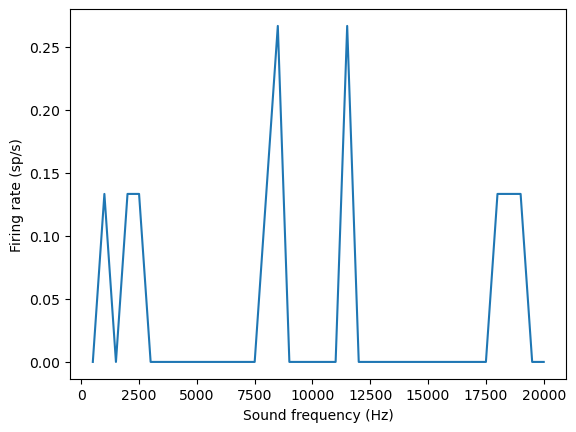

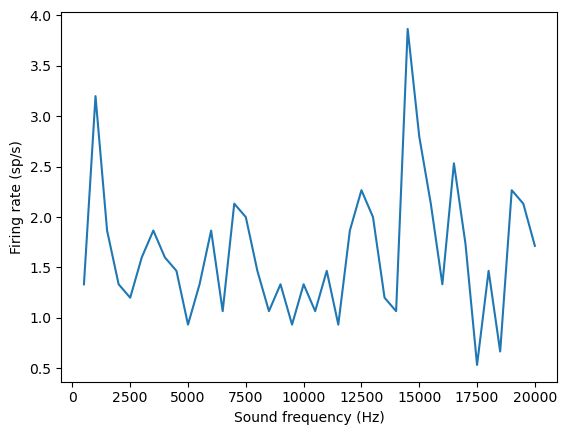

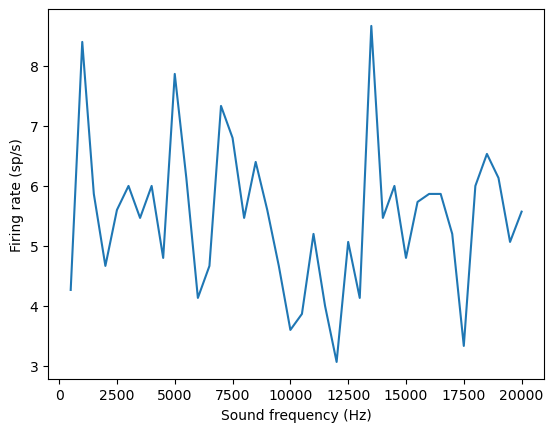

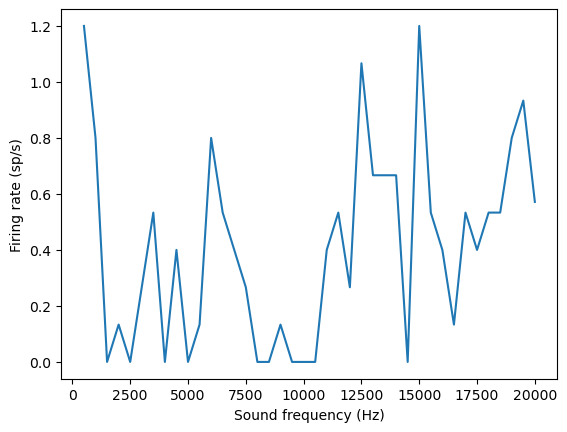

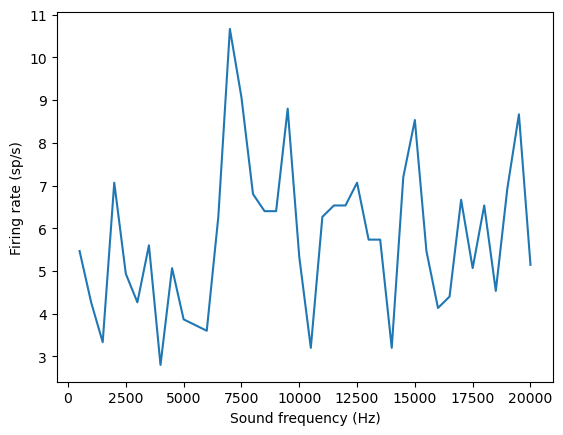

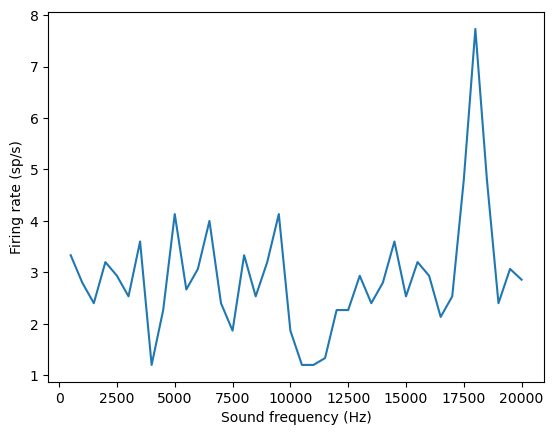

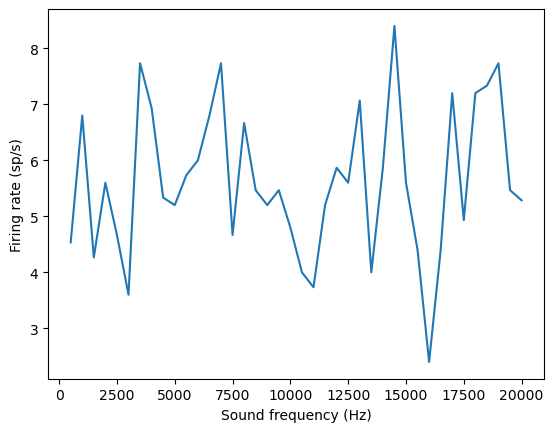

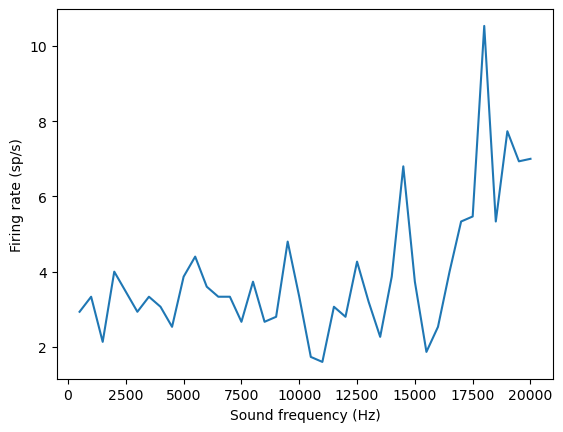

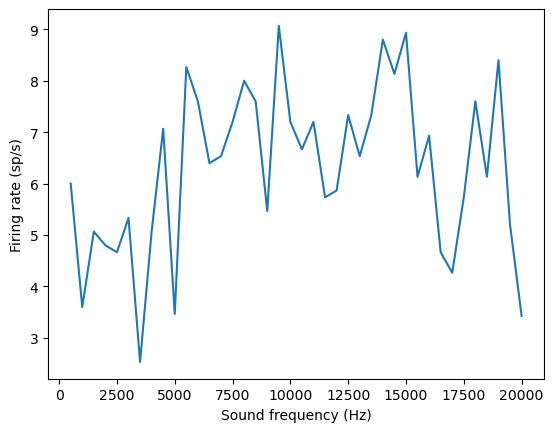

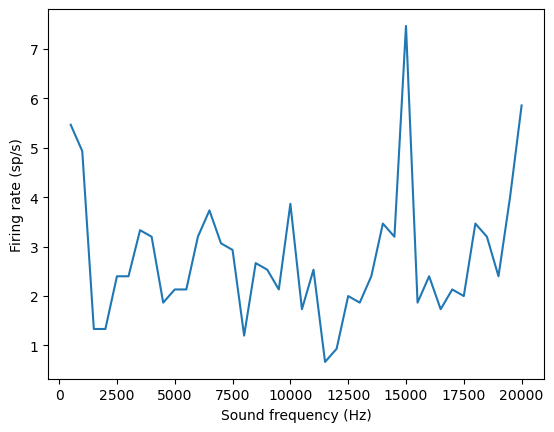

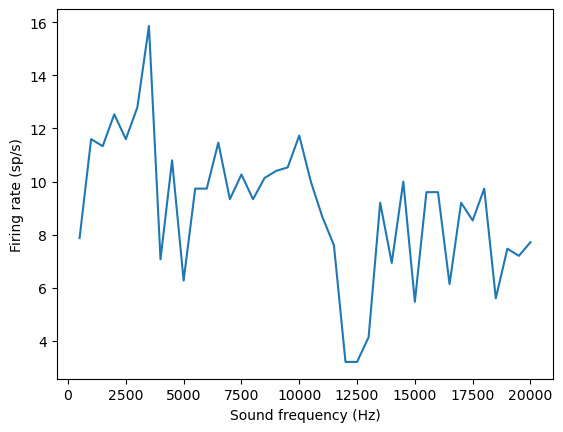

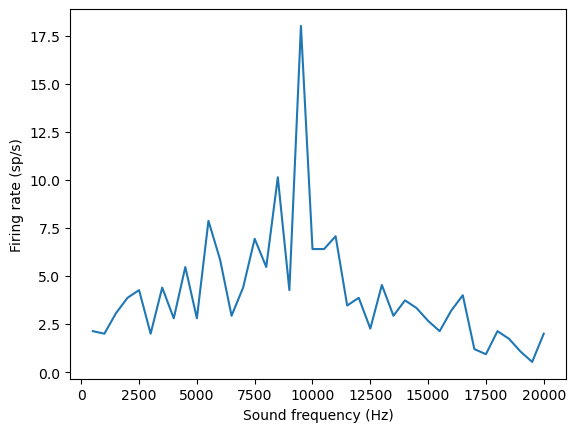

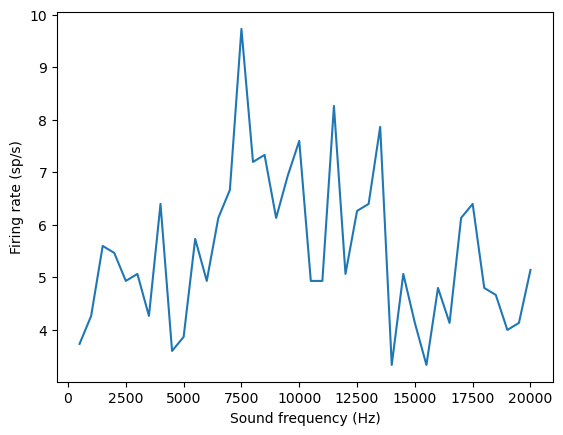

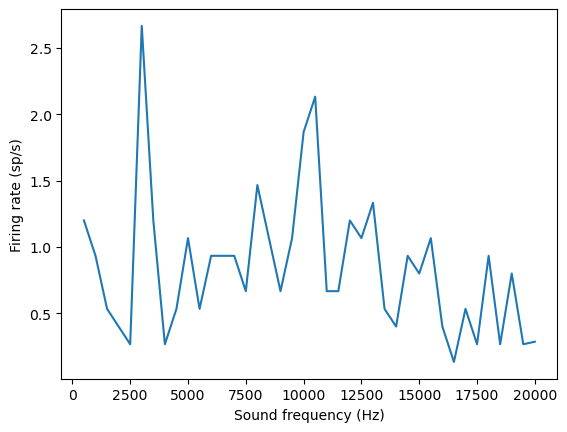

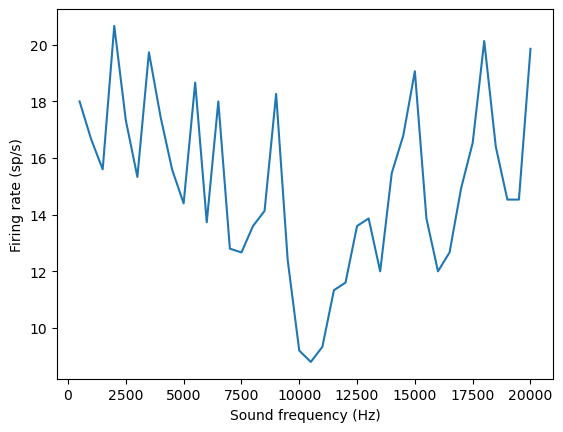

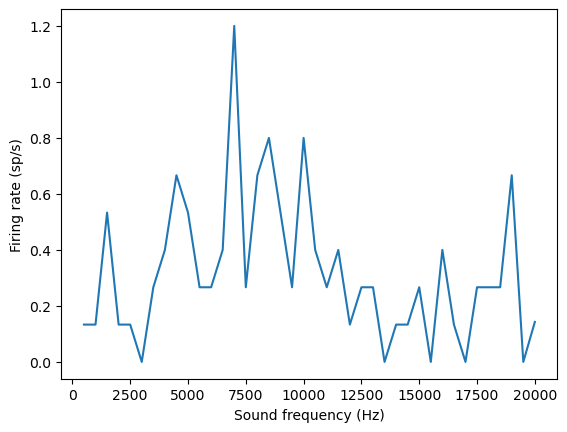

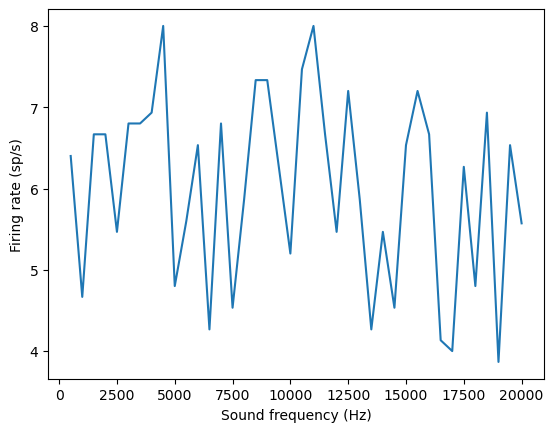

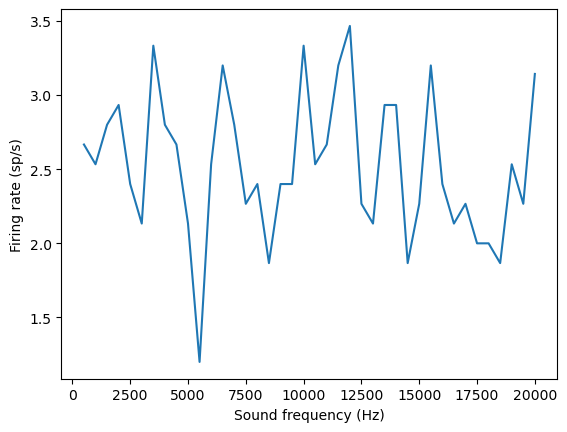

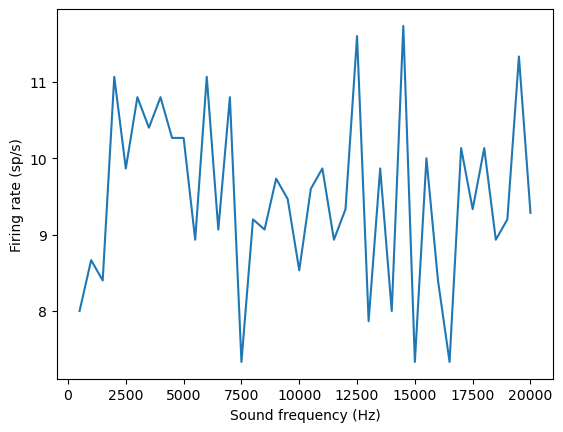

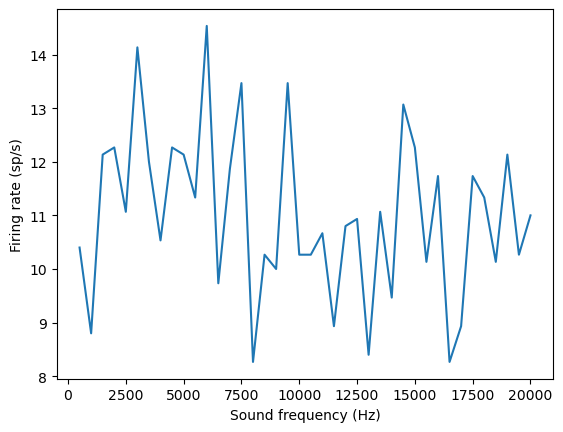

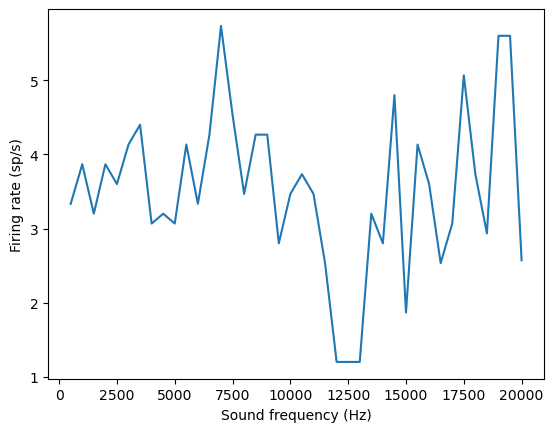

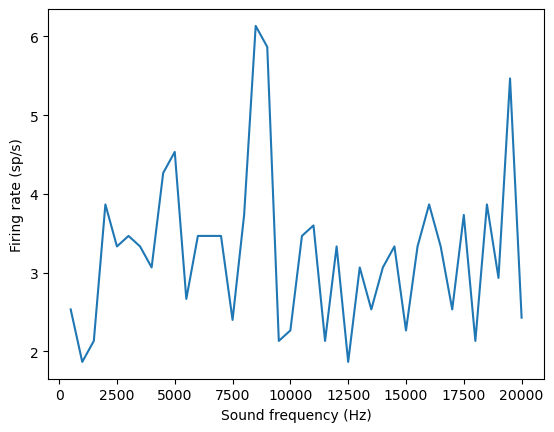

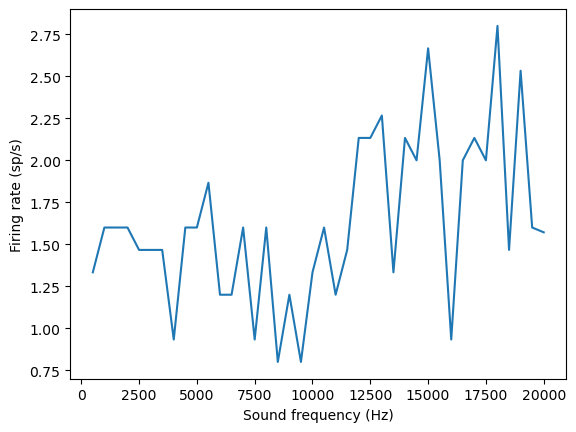

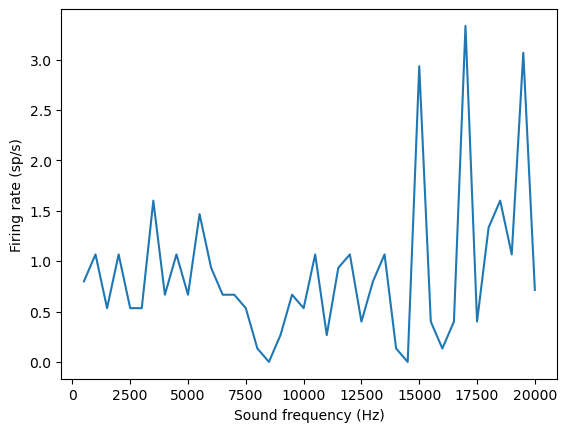

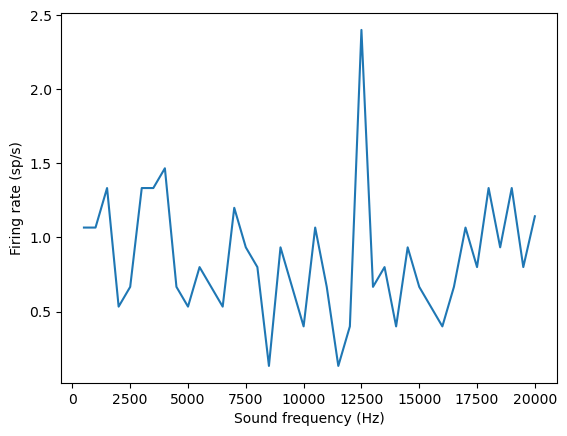

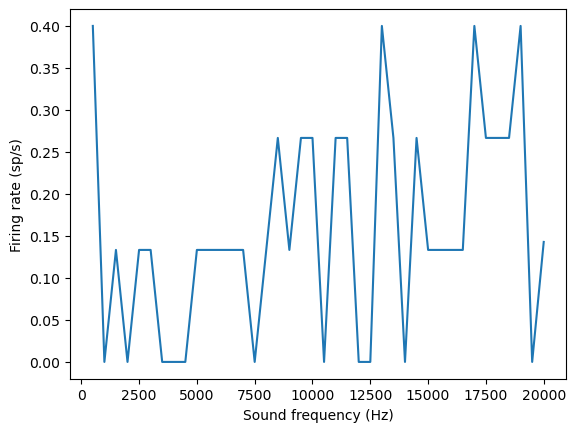

In [88]:
#plot a tuning curve

unique_frequencies = behavior_df['frequency'].unique()

for n in range(spikes_mat.shape[0]):
    plt.plot(unique_frequencies,tuning[n,:])
    plt.ylabel('Firing rate (sp/s)')
    plt.xlabel('Sound frequency (Hz)')
    plt.show()

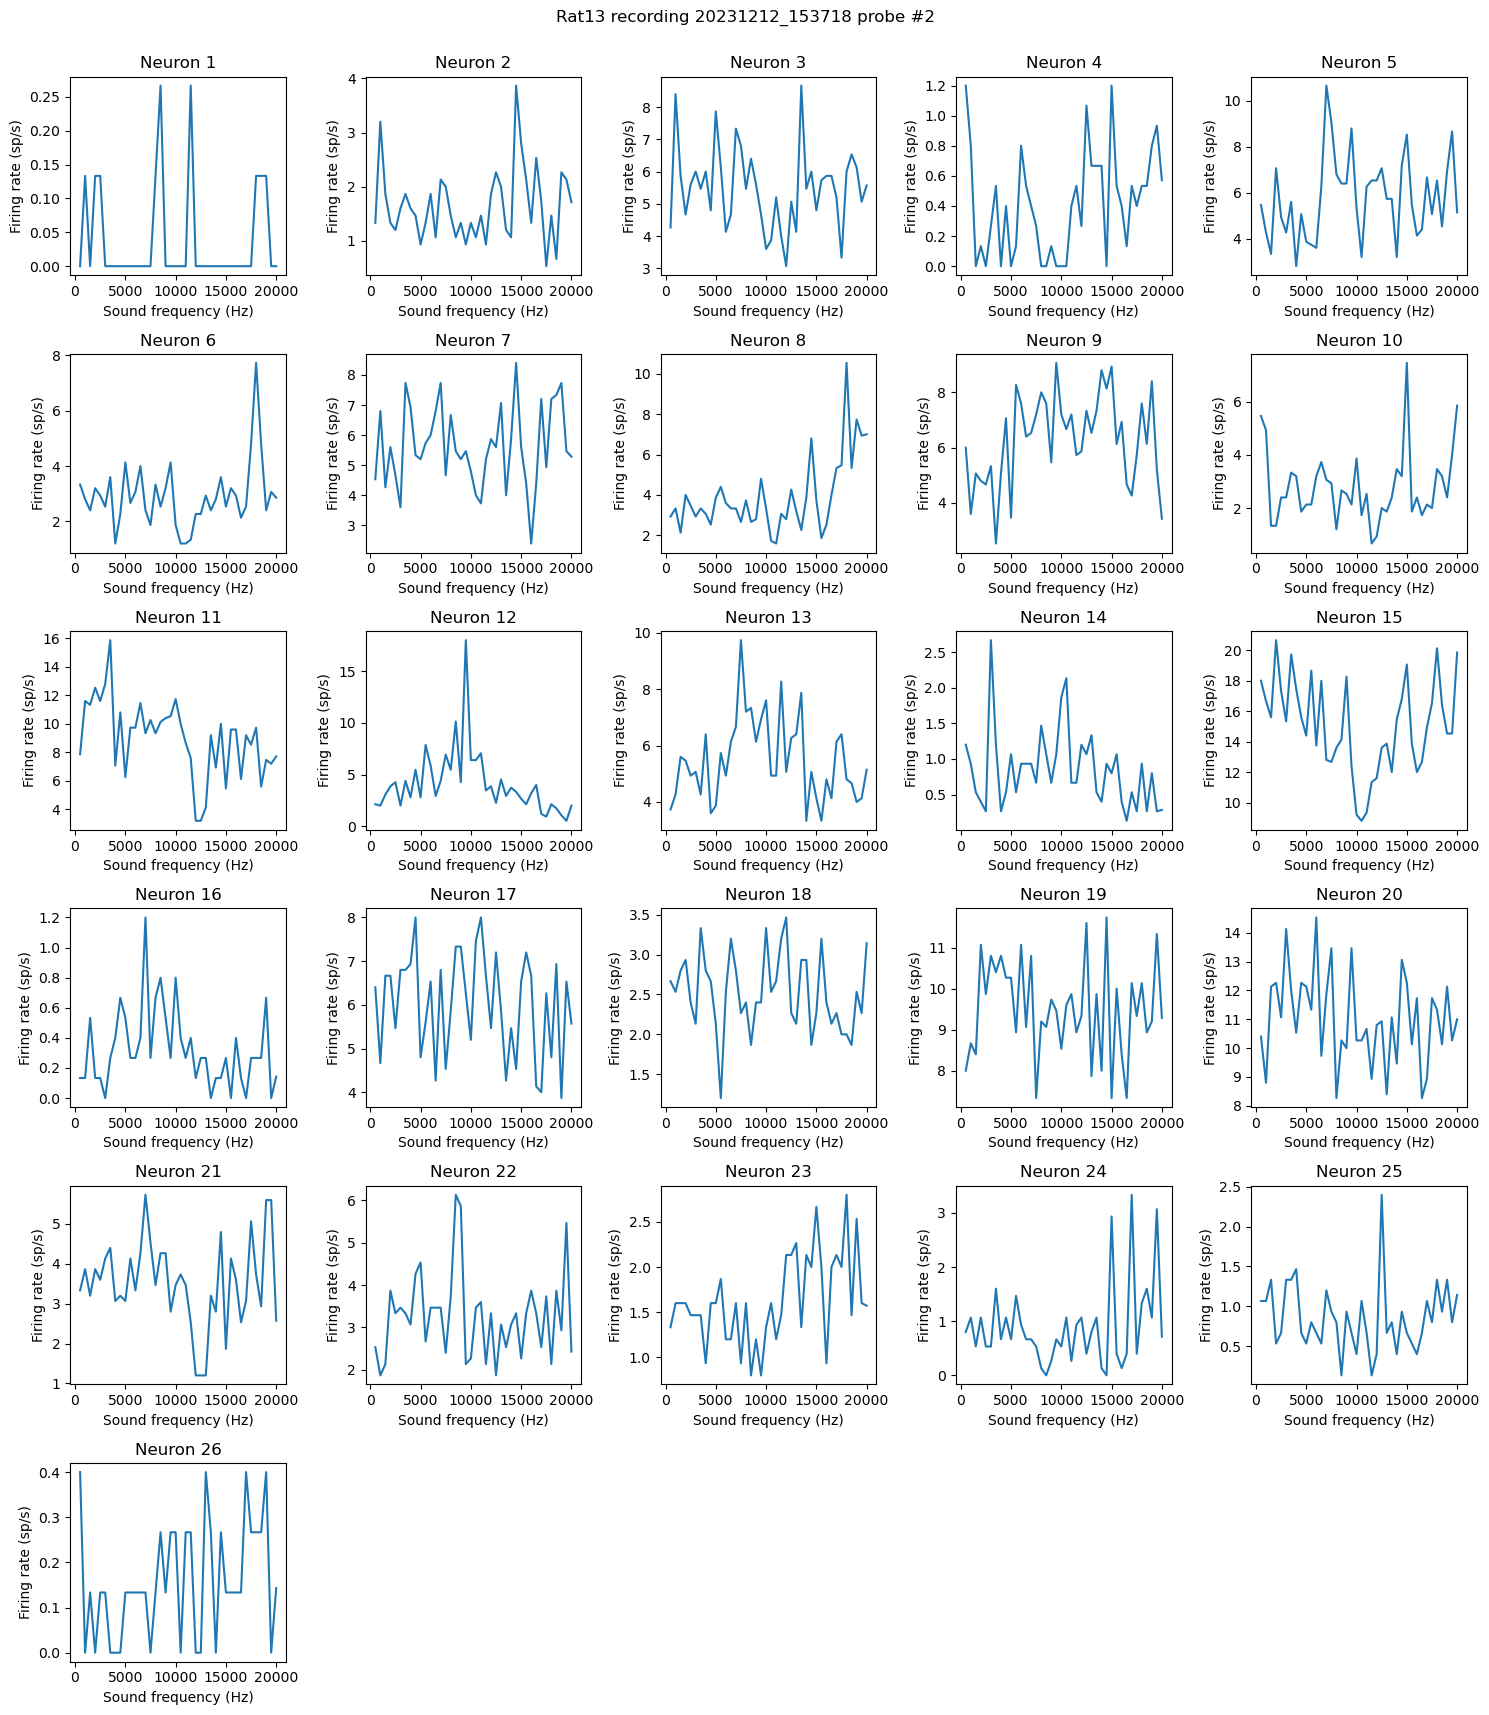

In [89]:
# Assuming data is a list or array of plots
num_plots = spikes_mat.shape[0]
num_rows = num_plots // 5 + (1 if num_plots % 5 != 0 else 0)
fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3*num_rows))

# Plot each item in the data
for i, ax in enumerate(axes.flat):
    if i < num_plots:
        ax.plot(unique_frequencies,tuning[i,:])  # Adjust this line to plot your data
        ax.set_title(f'Neuron {i+1}')  # Set a title for each subplot
        ax.set_ylabel('Firing rate (sp/s)')
        ax.set_xlabel('Sound frequency (Hz)')
    else:
        ax.axis('off')  # Turn off extra subplot axes

# Adjust layout to leave space for the suptitle
#plt.subplots_adjust(top=1.5)

# Add a title to the figure
plt.suptitle(f'Rat{rat_id} recording {rec_datetime} probe #{probe_num}')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Save the figure
plt.savefig(data_path+f'Rat{rat_id}_rec{rec_datetime}_tuningCurves_probe{probe_num}_n_neurons_{n_neurons}.png', dpi=300)  # Specify the filename and dpi (dots per inch) for resolution

# Show plot
plt.show()

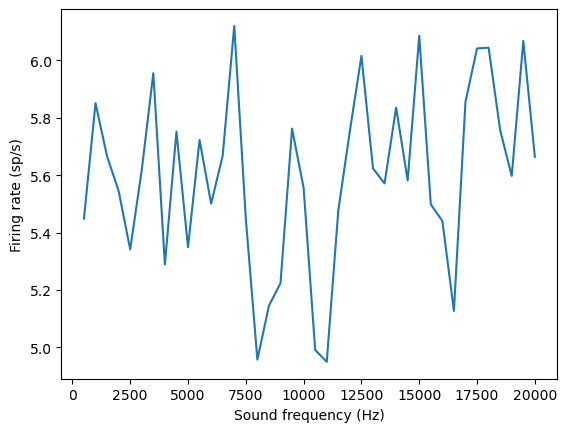

In [84]:
pop_average = tuning.mean(axis=0)
plt.plot(unique_frequencies,pop_average)
plt.ylabel('Firing rate (sp/s)')
plt.xlabel('Sound frequency (Hz)')
plt.show()